In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('classData.csv')
data

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983
...,...,...,...,...,...,...,...,...,...,...
7856,0,0,0,0,-66.237921,38.457041,24.912239,0.094421,-0.552019,0.457598
7857,0,0,0,0,-65.849493,37.465454,25.515675,0.103778,-0.555186,0.451407
7858,0,0,0,0,-65.446698,36.472055,26.106554,0.113107,-0.558211,0.445104
7859,0,0,0,0,-65.029633,35.477088,26.684731,0.122404,-0.561094,0.438690


In [3]:
data_null = data.isnull().sum()
data_null

G     0
C     0
B     0
A     0
Ia    0
Ib    0
Ic    0
Va    0
Vb    0
Vc    0
dtype: int64

In [4]:
prueba = data.loc[:,['G','C','B','A']]
hola = prueba.sample(10)
print(prueba.iloc[0:1])
prueba.iloc[0:1,3]

   G  C  B  A
0  1  0  0  1


0    1
Name: A, dtype: int64

In [5]:
def clasifier_fault(data):
    target = []
    for i in range(0,len(data)):
        c = data.iloc[i:int(i+1)].to_numpy().flatten()
        if c[0] == 0 and c[1] == 0 and c[2]==0 and c[3]==0:
            target.append(0)
        elif c[0] == 0 and c[1] == 1 and c[2]==1 and c[3]==0: 
             target.append(1)
        elif c[0] == 0 and c[1] == 1 and c[2]==1 and c[3]==1: 
             target.append(2)
        elif c[0] == 1 and c[1] == 0 and c[2]==0 and c[3]==1: 
             target.append(3)
        elif c[0] == 1 and c[1] == 0 and c[2]==1 and c[3]==1: 
             target.append(4)
        elif c[0] == 1 and c[1] == 1 and c[2]==1 and c[3]==1: 
             target.append(5)
    return target

In [6]:
df = data.loc[:,['G','C','B','A']]
len(df)
target = clasifier_fault(df)
data['target'] = target
data

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,target
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,3
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,3
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,3
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,3
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,3
...,...,...,...,...,...,...,...,...,...,...,...
7856,0,0,0,0,-66.237921,38.457041,24.912239,0.094421,-0.552019,0.457598,0
7857,0,0,0,0,-65.849493,37.465454,25.515675,0.103778,-0.555186,0.451407,0
7858,0,0,0,0,-65.446698,36.472055,26.106554,0.113107,-0.558211,0.445104,0
7859,0,0,0,0,-65.029633,35.477088,26.684731,0.122404,-0.561094,0.438690,0


In [7]:
def falla(data):
    target = []
    if data == 0:
        target.append('No hay falla')
    elif data == 1:
        target.append('Falla entre fase A y fase B')
    elif data == 2:
        target.append('Falla en todas las fases')
    elif data == 3:
        target.append('Falla entre fase A y tierra')
    elif data == 4:
        target.append('Falla entre fase A,B y tierra')
    elif data == 5:
        target.append('Falla entre todas las fases y tierra')
    return target

In [8]:
data['falla'] = data.target.apply(lambda x: falla(x))
data['falla'] = data.falla.apply(lambda x: x[0])
data

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,target,falla
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,3,Falla entre fase A y tierra
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,3,Falla entre fase A y tierra
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,3,Falla entre fase A y tierra
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,3,Falla entre fase A y tierra
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,3,Falla entre fase A y tierra
...,...,...,...,...,...,...,...,...,...,...,...,...
7856,0,0,0,0,-66.237921,38.457041,24.912239,0.094421,-0.552019,0.457598,0,No hay falla
7857,0,0,0,0,-65.849493,37.465454,25.515675,0.103778,-0.555186,0.451407,0,No hay falla
7858,0,0,0,0,-65.446698,36.472055,26.106554,0.113107,-0.558211,0.445104,0,No hay falla
7859,0,0,0,0,-65.029633,35.477088,26.684731,0.122404,-0.561094,0.438690,0,No hay falla


In [9]:
data_bal = data.loc[:,['Ia','target']].groupby(['target']).count()
data_bal = data_bal.apply(lambda x: x*100/data.shape[0])
data_bal

,Ia
target,
0,30.085231
1,12.771912
2,13.942247
3,14.362040
4,14.425646
5,14.412925


In [10]:
data_bal = data.loc[:,['Ia','falla']].groupby(['falla']).count()
data_bal = data_bal.apply(lambda x: x*100/data.shape[0])
data_bal

,Ia
falla,
Falla en todas las fases,13.942247
Falla entre fase A y fase B,12.771912
Falla entre fase A y tierra,14.362040
"Falla entre fase A,B y tierra",14.425646
Falla entre todas las fases y tierra,14.412925
No hay falla,30.085231


In [55]:
X = data.loc[:,['Ia','Ib','Ic','Va','Vb','Vc']]
y = data.target

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.fit_transform(X_test)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [58]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [59]:
y_pred_train = knn.predict(X_train)

0.88


<AxesSubplot:>

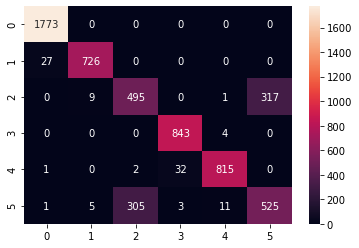

In [60]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(y_train, y_pred_train).round(2))
cm = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm, annot=True,fmt='d')

0.81


<AxesSubplot:>

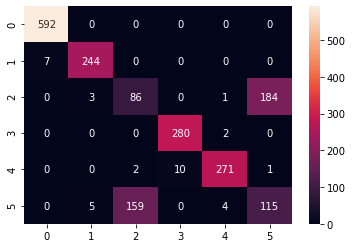

In [61]:
y_pred_test = knn.predict(X_test)
print(accuracy_score(y_test, y_pred_test).round(2))
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True,fmt='d')

In [62]:
data['target_binaria'] = data.target.apply(lambda x: x if x == 0 else 1)
data

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,target,falla,target_binaria
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,3,Falla entre fase A y tierra,1
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,3,Falla entre fase A y tierra,1
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,3,Falla entre fase A y tierra,1
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,3,Falla entre fase A y tierra,1
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,3,Falla entre fase A y tierra,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7856,0,0,0,0,-66.237921,38.457041,24.912239,0.094421,-0.552019,0.457598,0,No hay falla,0
7857,0,0,0,0,-65.849493,37.465454,25.515675,0.103778,-0.555186,0.451407,0,No hay falla,0
7858,0,0,0,0,-65.446698,36.472055,26.106554,0.113107,-0.558211,0.445104,0,No hay falla,0
7859,0,0,0,0,-65.029633,35.477088,26.684731,0.122404,-0.561094,0.438690,0,No hay falla,0


In [63]:
data_bal = data.loc[:,['Ia','target_binaria']].groupby(['target_binaria']).count()
data_bal = data_bal.apply(lambda x: x*100/data.shape[0])
data_bal

,Ia
target_binaria,
0,30.085231
1,69.914769


In [64]:
X = data.loc[:,['Ia','Ib','Ic','Va','Vb','Vc']]
y = data.target_binaria

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [66]:
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.fit_transform(X_test)

In [67]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [68]:
y_pred_train = knn.predict(X_train)

0.9955894826123833


<AxesSubplot:>

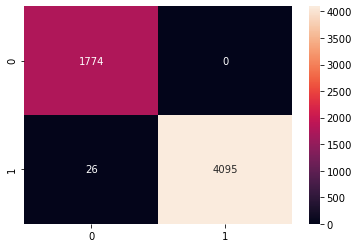

In [71]:
print(accuracy_score(y_train, y_pred_train))
cm = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm, annot=True,fmt='d')

0.9954221770091557


<AxesSubplot:>

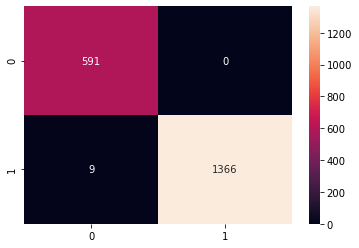

In [72]:
y_pred_test = knn.predict(X_test)
print(accuracy_score(y_test, y_pred_test))
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True,fmt='d')